# Extracting tweets using Twitter application

We will first install the relevant packages that we need. To extract tweets from Twitter, we will need package ‘twitteR’.

‘Syuzhet’ package will be used for sentiment analysis; while ‘tm’ and ‘SnowballC’ packages are used for text mining and analysis.

In [4]:
#  Install Requried Packages
##installed.packages("SnowballC")
##installed.packages("tm")
##installed.packages("twitteR")
##installed.packages("syuzhet")
 
# Load Requried Packages
library("SnowballC")
library("tm")
library("twitteR")
library("syuzhet")
library("NLP")

Next, we will invoke Twitter API using the app we have created and using the keys and access tokens we got through the app.

In [7]:
# Authonitical keys
consumer_key <- 'Nv398VLktqUxB716ojucJy6Zz'
consumer_secret <- 'MNUVYoXvnNiLWDVpnsHrEB7Lv6eI9ak4qUmRN4W7UeZNcEXBfQ'
access_token <- '3147881881-mjRyg0x08VLH4fhcxmHUQuBazvDaRsrXzVBXcxj'
access_secret <- 'iCqmG7B8xEGwQI5qxkLSZkaHx38jco6zz6qbRUmTErIdQ'
 
setup_twitter_oauth(consumer_key, consumer_secret, access_token, access_secret)
tweets <- userTimeline("boywigh", n=200)
 
n.tweet <- length(tweets)

[1] "Using direct authentication"


We have invoked the Twitter app and extracted data from the twitter handle ‘@boywigh’ i.e., myself. We will now see what format we have got the extract and what all steps do we need to take to clean the data.

## Cleaning the tweets for further analysis

In [9]:
tweets.df <- twListToDF(tweets) 
 
head(tweets.df)

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
I posted a new video to Facebook https://t.co/wwr1SmBI08,FALSE,0,NA,2018-06-17 11:33:59,FALSE,NA,1008311791963852800,NA,"<a href=""http://www.facebook.com/twitter"" rel=""nofollow"">Facebook</a>",boywigh,0,FALSE,FALSE,NA,NA
#HangShahbaazUnderPOCSO No outrage probably because this is a secular rape. There is no protest since the paid bimb… https://t.co/QIRqz9iU7H,FALSE,1,NA,2018-04-29 22:17:30,TRUE,NA,990716732577730560,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",boywigh,0,FALSE,FALSE,NA,NA
#vinci #deadshot https://t.co/OJk4BKFCXc,FALSE,0,NA,2018-04-11 10:04:16,FALSE,NA,984009227676069893,NA,"<a href=""http://instagram.com"" rel=""nofollow"">Instagram</a>",boywigh,0,FALSE,FALSE,NA,NA
Follow my writings on https://t.co/LEBdvqRti2 #yourquote via @YourQuoteApp https://t.co/0Tn3RKGNBL,FALSE,1,NA,2017-09-27 17:52:19,FALSE,NA,913098995395813376,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",boywigh,0,FALSE,FALSE,NA,NA
Whatever comes after but is bullshit. Follow my writings on https://t.co/LEBdvqRti2 #yourquote via @YourQuoteApp… https://t.co/8uz9nxSvpM,FALSE,1,NA,2017-08-25 08:51:40,TRUE,NA,901004134593187840,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",boywigh,0,FALSE,FALSE,NA,NA
Loneliness makes life miserable but its always better than fake one. Follow my writings on https://t.co/LEBdvqRti2… https://t.co/XJ2ECwXr3s,FALSE,1,NA,2017-08-25 07:44:53,TRUE,NA,900987327484317696,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",boywigh,0,FALSE,FALSE,NA,NA


We get a total of 16 variables using ‘userTimeline’ function, snapshot of the sample data is shown below.

The field ‘text’ contains the tweet part, hashtags, and URLs. We need to remove hashtags and URLs from the text field so that we are left only with the main tweet part to run our sentiment analysis.

Our current text field looks like below:

In [10]:
head(tweets.df$text)

[1] "I posted a new video to Facebook https://t.co/wwr1SmBI08"                                                                                      
[2] "#HangShahbaazUnderPOCSO\nNo outrage probably because this is a secular rape. There is no protest since the paid bimb… https://t.co/QIRqz9iU7H" 
[3] "#vinci #deadshot https://t.co/OJk4BKFCXc"                                                                                                      
[4] "Follow my writings on https://t.co/LEBdvqRti2 #yourquote via @YourQuoteApp https://t.co/0Tn3RKGNBL"                                            
[5] "Whatever comes after but is bullshit.\n\nFollow my writings on https://t.co/LEBdvqRti2 #yourquote via @YourQuoteApp… https://t.co/8uz9nxSvpM"  
[6] "Loneliness makes life miserable but its always better than fake one.\n\nFollow my writings on https://t.co/LEBdvqRti2… https://t.co/XJ2ECwXr3s"

This contains a lot of URLs, hashtags and other twitter handles. We will remove all these using the gsub function.

In [11]:
tweets.df2 <- gsub("http.*","",tweets.df$text)
 
tweets.df2 <- gsub("https.*","",tweets.df2)
 
tweets.df2 <- gsub("#.*","",tweets.df2)
 
tweets.df2 <- gsub("@.*","",tweets.df2)

Our output now looks like below:

In [13]:
head(tweets.df2)

[1] "I posted a new video to Facebook "                                                             
[2] ""                                                                                              
[3] ""                                                                                              
[4] "Follow my writings on "                                                                        
[5] "Whatever comes after but is bullshit.\n\nFollow my writings on "                               
[6] "Loneliness makes life miserable but its always better than fake one.\n\nFollow my writings on "

Now, we have only the relevant part of the tweets and we can run our sentiment analysis part on the data.

## Getting sentiment score for each tweet
We will first try to get the emotion score for each of the tweets. ‘Syuzhet’ breaks the emotion into 10 different emotions – anger, anticipation, disgust, fear, joy, sadness, surprise, trust, negative and positive.

In [14]:
word.df <- as.vector(tweets.df2)
 
emotion.df <- get_nrc_sentiment(word.df)
 
emotion.df2 <- cbind(tweets.df2, emotion.df) 
 
head(emotion.df2)

tweets.df2,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
I posted a new video to Facebook,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0
Follow my writings on,0,0,0,0,0,0,0,0,0,0
Whatever comes after but is bullshit. Follow my writings on,0,0,0,0,0,0,0,0,0,0
Loneliness makes life miserable but its always better than fake one. Follow my writings on,1,0,1,1,0,2,0,0,3,0


In [15]:
head(emotion.df2)

tweets.df2,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
I posted a new video to Facebook,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0
Follow my writings on,0,0,0,0,0,0,0,0,0,0
Whatever comes after but is bullshit. Follow my writings on,0,0,0,0,0,0,0,0,0,0
Loneliness makes life miserable but its always better than fake one. Follow my writings on,1,0,1,1,0,2,0,0,3,0


The above output shows us the different emotions present in each of the tweets.
Now, we will use the get_sentiment function to extract sentiment score for each of the tweets.

In [16]:
sent.value <- get_sentiment(word.df)
 
most.positive <- word.df[sent.value == max(sent.value)]
 
most.positive

[1] "27 - What makes me unique is that in my hometown I'm the only left 'Single by birth exist' in the whole I knew, I must be so special."

In [17]:
most.negative <- word.df[sent.value <= min(sent.value)] 
most.negative 

[1] "Feeling shitty head sucked missing crying crushing brain headless\nF**k"

Let us see how the score of each of the tweets has been calculated. In all, there are 154 tweets that we are evaluating, so there should be 154 positive/negative scores, one for each of the tweets.

In [18]:
sent.value

[1]  0.80  0.00  0.00  0.00 -0.50 -1.70  0.05  0.80  0.85  0.00  0.75  0.75
 [13] -0.40  0.00  0.00  0.00  2.15  0.00 -0.75  0.00  0.00 -0.75 -0.75  0.00
 [25]  0.75  0.00 -1.75  1.35  0.50  0.05 -0.75  0.30  0.50  1.25  0.50 -0.75
 [37] -1.00  0.00  1.50  0.50 -0.75  0.00 -1.00  0.35 -1.50 -0.35  0.50 -0.45
 [49]  0.00  0.50 -0.75  0.00  0.50  0.00  0.00  0.00 -0.75  0.00  0.50  0.00
 [61]  0.50  0.50  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
 [73]  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
 [85]  0.00  0.00  1.45  1.55  0.00  0.00 -2.75 -2.25  1.35  0.00 -0.75 -1.50
 [97]  0.75  0.75 -1.50  0.30  1.55 -0.65  1.70  0.40  0.00 -0.85 -0.40 -0.50
[109]  1.25  1.40 -0.75  0.00 -0.60 -0.50  1.25 -0.50  0.25  0.50 -0.60 -0.40
[121] -2.25  0.50  0.90  0.00 -1.50  0.75 -1.20  1.75 -0.15  0.25  1.25 -1.50
[133]  0.75 -1.75  0.25  0.85  0.80 -0.40 -0.25  0.80 -0.75  0.75  1.05 -1.00
[145]  0.20 -1.50  0.50  0.00  1.25 -0.50  1.40  0.60  0.25  0.80  0.50  2.60
[157]  2.50  2.05  0.45  0.50  0.25 -0.50 -0.50  0.55  0.00  0.50  0.00  0.00
[169]  1.40  0.25 -1.25  0.35 -0.50  1.60  1.75  0.25  0.80 -0.75  2.30  0.90
[181] -0.25  0.40  0.60 -0.15 -0.75 -0.65  0.50 -2.05 -0.15

## Segregating positive and negative tweets
Now, we will segregate positive and negative tweets based on the score assigned to each of the tweets.

In [19]:
positive.tweets <- word.df[sent.value > 0]
head(positive.tweets)

[1] "I posted a new video to Facebook "                                                                        
[2] "Your expectation levels is directly proportional to your disappointment level.\n\nFollow my writings on… "
[3] "When its over and things aren't getting better then, is it OK to let go????\n\nFollow my writings on… "   
[4] "Sometime I wish for easy life but the problem is I chose the other way...\n\nFollow my writings on… "     
[5] "Love someone somebody letgo let go\n\nFollow my writings on "                                             
[6] "How can someone love somebody so much to let go.....!\n\nFollow my writings on "

In [20]:
negative.tweets <- word.df[sent.value < 0]
head(negative.tweets)

[1] "Whatever comes after but is bullshit.\n\nFollow my writings on "                               
[2] "Loneliness makes life miserable but its always better than fake one.\n\nFollow my writings on "
[3] "World didn't stop. Why did I?\n\nFollow my writings on "                                       
[4] "Bogus Computer - Security, Part - 1 Passwords "                                                
[5] "Bogus Computer : Intro "                                                                       
[6] "Bogus Computer : Intro "

In [22]:
neutral.tweets <- word.df[sent.value == 0]
head(neutral.tweets)

[1] ""                                                                                              
[2] ""                                                                                              
[3] "Follow my writings on "                                                                        
[4] "Plan for future will be executed tomorrow, but tomorrow never comes.\n\nFollow my writings on "
[5] "."                                                                                             
[6] ""

In [23]:
# Alternate way to classify as Positive, Negative or Neutral tweets
 
category_senti <- ifelse(sent.value < 0, "Negative", ifelse(sent.value > 0, "Positive", "Neutral"))
 
head(category_senti)

[1] "Positive" "Neutral"  "Neutral"  "Neutral"  "Negative" "Negative"

In [32]:
table(category_senti)
category_senti

category_senti
Negative  Neutral Positive 
      55       55       79 

[1] "Positive" "Neutral"  "Neutral"  "Neutral"  "Negative" "Negative"
  [7] "Positive" "Positive" "Positive" "Neutral"  "Positive" "Positive"
 [13] "Negative" "Neutral"  "Neutral"  "Neutral"  "Positive" "Neutral" 
 [19] "Negative" "Neutral"  "Neutral"  "Negative" "Negative" "Neutral" 
 [25] "Positive" "Neutral"  "Negative" "Positive" "Positive" "Positive"
 [31] "Negative" "Positive" "Positive" "Positive" "Positive" "Negative"
 [37] "Negative" "Neutral"  "Positive" "Positive" "Negative" "Neutral" 
 [43] "Negative" "Positive" "Negative" "Negative" "Positive" "Negative"
 [49] "Neutral"  "Positive" "Negative" "Neutral"  "Positive" "Neutral" 
 [55] "Neutral"  "Neutral"  "Negative" "Neutral"  "Positive" "Neutral" 
 [61] "Positive" "Positive" "Neutral"  "Neutral"  "Neutral"  "Neutral" 
 [67] "Neutral"  "Neutral"  "Neutral"  "Neutral"  "Neutral"  "Neutral" 
 [73] "Neutral"  "Neutral"  "Neutral"  "Neutral"  "Neutral"  "Neutral" 
 [79] "Neutral"  "Neutral"  "Neutral"  "Neutral"  "Neutral"  "Neutral" 
 [85] "Neutral"  "Neutral"  "Positive" "Positive" "Neutral"  "Neutral" 
 [91] "Negative" "Negative" "Positive" "Neutral"  "Negative" "Negative"
 [97] "Positive" "Positive" "Negative" "Positive" "Positive" "Negative"
[103] "Positive" "Positive" "Neutral"  "Negative" "Negative" "Negative"
[109] "Positive" "Positive" "Negative" "Neutral"  "Negative" "Negative"
[115] "Positive" "Negative" "Positive" "Positive" "Negative" "Negative"
[121] "Negative" "Positive" "Positive" "Neutral"  "Negative" "Positive"
[127] "Negative" "Positive" "Negative" "Positive" "Positive" "Negative"
[133] "Positive" "Negative" "Positive" "Positive" "Positive" "Negative"
[139] "Negative" "Positive" "Negative" "Positive" "Positive" "Negative"
[145] "Positive" "Negative" "Positive" "Neutral"  "Positive" "Negative"
[151] "Positive" "Positive" "Positive" "Positive" "Positive" "Positive"
[157] "Positive" "Positive" "Positive" "Positive" "Positive" "Negative"
[163] "Negative" "Positive" "Neutral"  "Positive" "Neutral"  "Neutral" 
[169] "Positive" "Positive" "Negative" "Positive" "Negative" "Positive"
[175] "Positive" "Positive" "Positive" "Negative" "Positive" "Positive"
[181] "Negative" "Positive" "Positive" "Negative" "Negative" "Negative"
[187] "Positive" "Negative" "Negative"

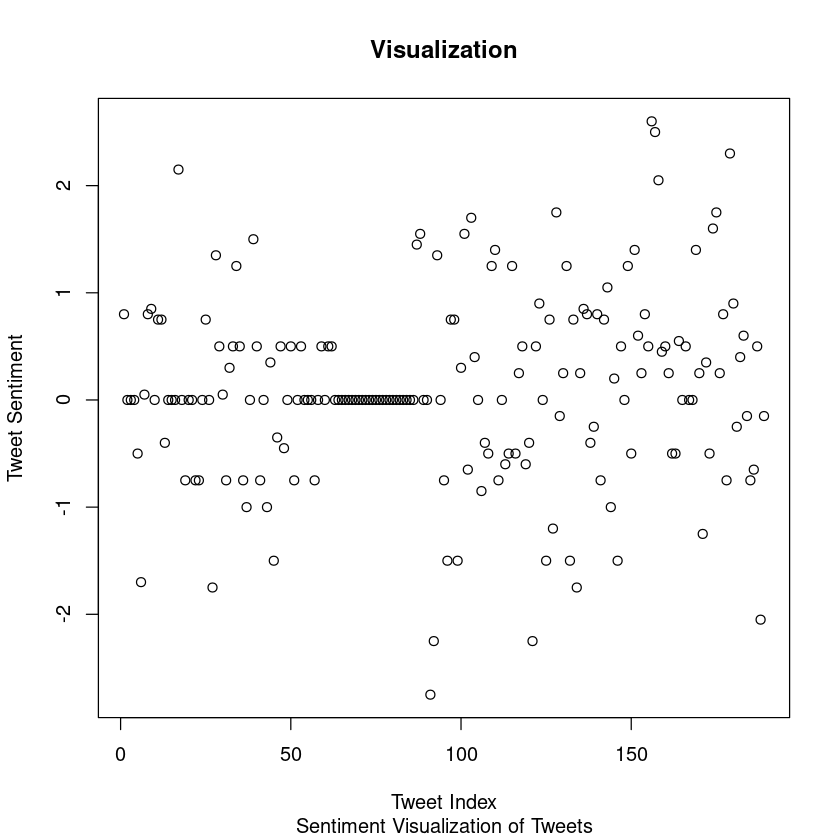

In [52]:
plot(sent.value,main="Visualization", sub="Sentiment Visualization of Tweets",xlab="Tweet Index", ylab="Tweet Sentiment")

# Findings
Above table defines thatmy tweets has  55  Negative  55  Neutral  79  Positive and hence my tweets are slightly positive.
Also fromVisualization we can see that my tweets were a mixed in sentiments at early stage then it became neutral. After it again became mixed but we can see that sentiments for positive as well as negative is high and hence we can conclude that our postivity or negativity increases as we grow and also if there is any neutral period.